# Wind Study Toulouse

## 1 - Preliminary work

### 1.1 - Import packages and load data

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [3]:
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

Toutes les données sont différentes
Toutes les données sont différentes


### 1.2 - Tendency and Seasonnality study

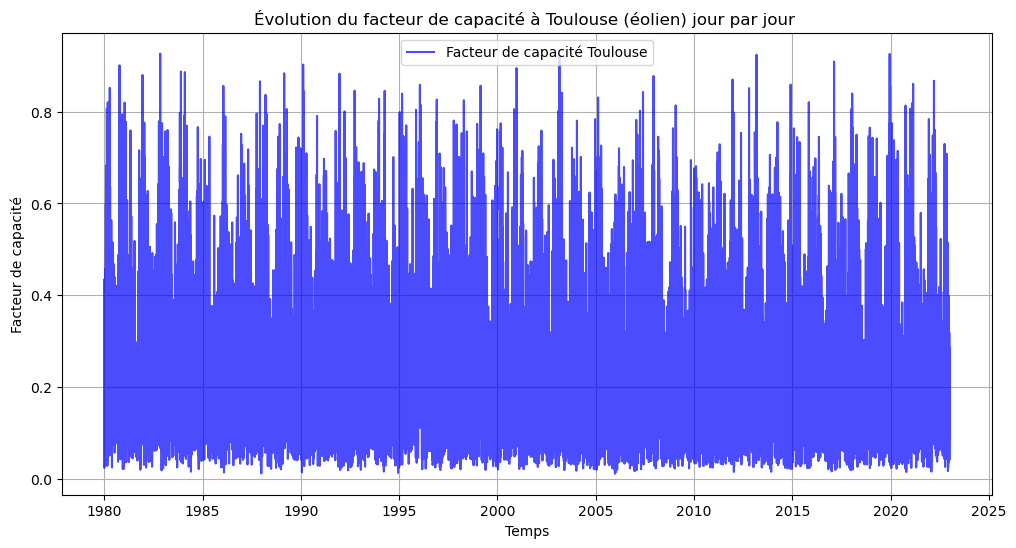

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_wind.index, data_dToulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calcul de la tendance et de la saisonnalité

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,seasonnality_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile28_d')


Tendance à Toulouse :  0.22975704879239356


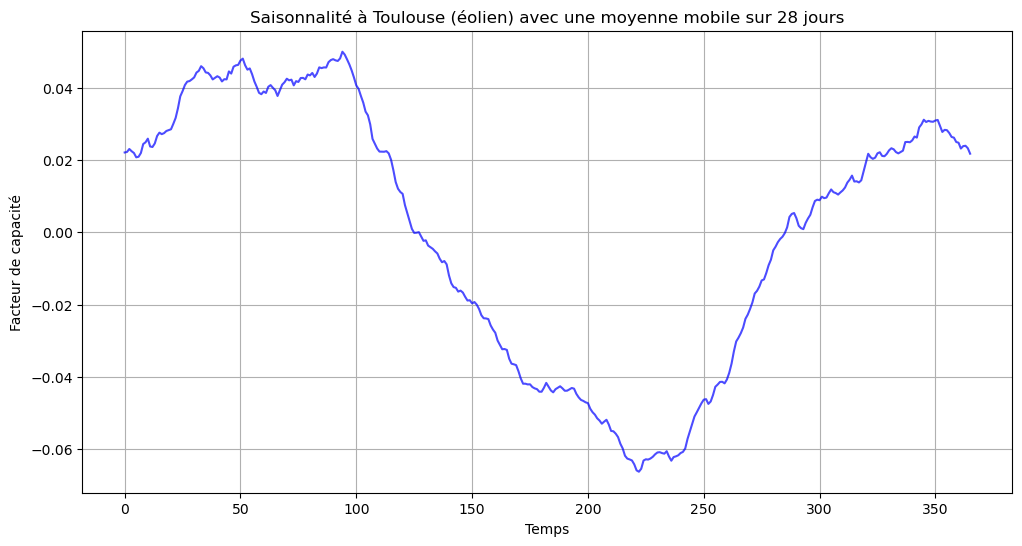

In [6]:
# Affichage de la tendance et de la saisonnalité

print("Tendance à Toulouse : ",tendency_Toulouse_wind)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),seasonnality_Toulouse_wind, label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec une moyenne mobile sur 28 jours')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

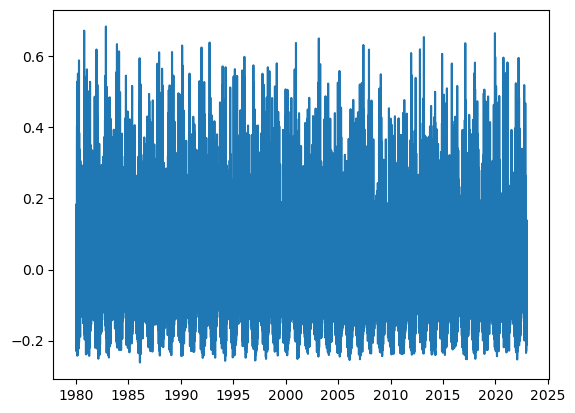

In [7]:
# Affichage des résidus

from methodes_etude_serie import Retrait_Tendance_Saisonnalite

data_stationnary = Retrait_Tendance_Saisonnalite(data_dToulouse_wind, tendency_Toulouse_wind, seasonnality_Toulouse_wind)

plt.plot(data_stationnary['electricity'])

### 1-3 Seasonnality sinus approximation

Pourrait valoir le coup d'étudier le seuil du sinus aussi

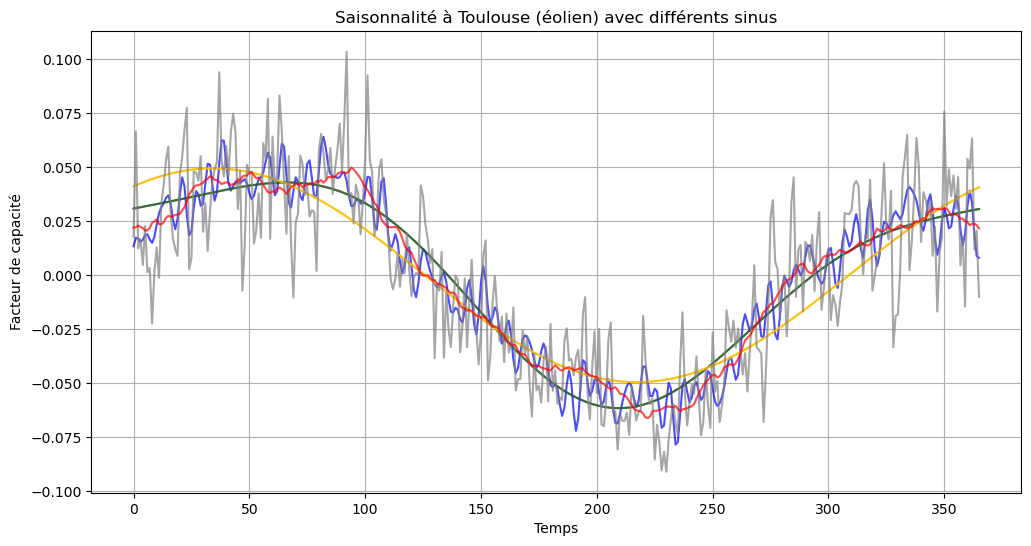

In [8]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé sans moyenne mobile avec différents seuils

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,sinus1_t10_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t10')
tendency_Toulouse_wind,sinus1_t7_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t7')
tendency_Toulouse_wind,sinus1_t5_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t5')
tendency_Toulouse_wind,sinus1_t3_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t3')
tendency_Toulouse_wind,sinus1_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_wind,mean_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t10_Toulouse_wind, label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus1_t7_Toulouse_wind, label='Facteur de capacité Toulouse', color='purple', alpha=0.7)
plt.plot(np.arange(366),sinus1_t5_Toulouse_wind, label='Facteur de capacité Toulouse', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus1_t3_Toulouse_wind, label='Facteur de capacité Toulouse', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus1_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='orange', alpha=0.7)

plt.plot(np.arange(366),mean_Toulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

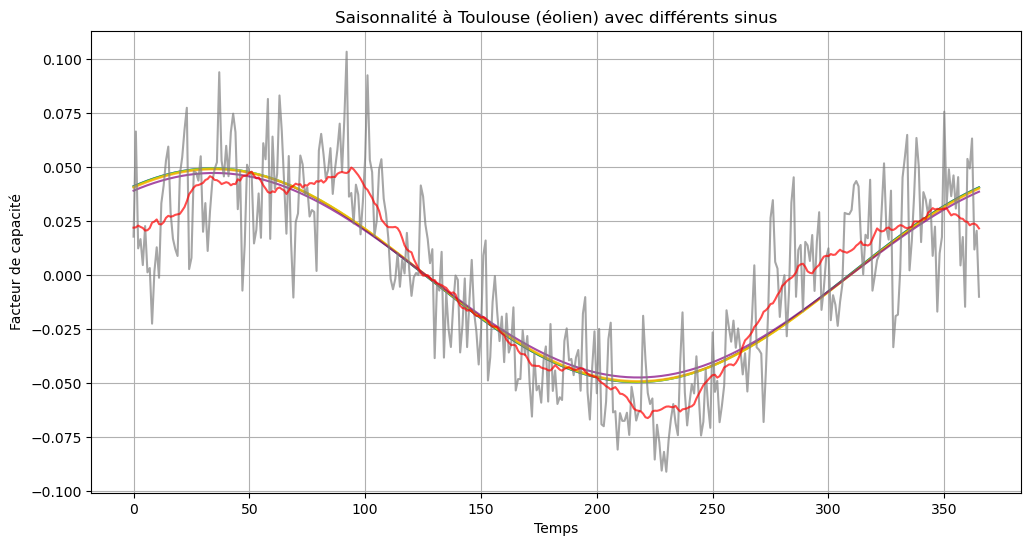

In [9]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé avec différentes moyennes mobiles avec un seuil de 0.5

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,sinus1_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_wind,sinus3_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus3_t2')
tendency_Toulouse_wind,sinus7_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus7_t2')
tendency_Toulouse_wind,sinus14_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus14_t2')
tendency_Toulouse_wind,sinus28_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus28_t2')
tendency_Toulouse_wind,sinus60_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus60_t2')
tendency_Toulouse_wind,mean_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus3_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='lightblue', alpha=0.7)
plt.plot(np.arange(366),sinus7_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus14_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus28_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='orange', alpha=0.7)
plt.plot(np.arange(366),sinus60_t2_Toulouse_wind, label='Facteur de capacité Toulouse', color='purple', alpha=0.7)

plt.plot(np.arange(366),mean_Toulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

## 2- Arma and Arimax modelisation

### 2-1 Arma modelisation

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


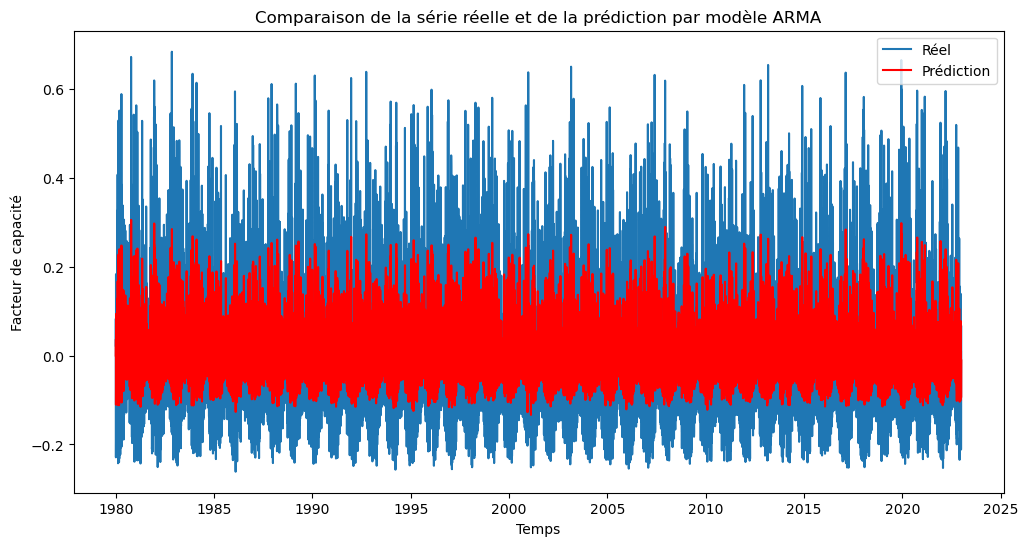

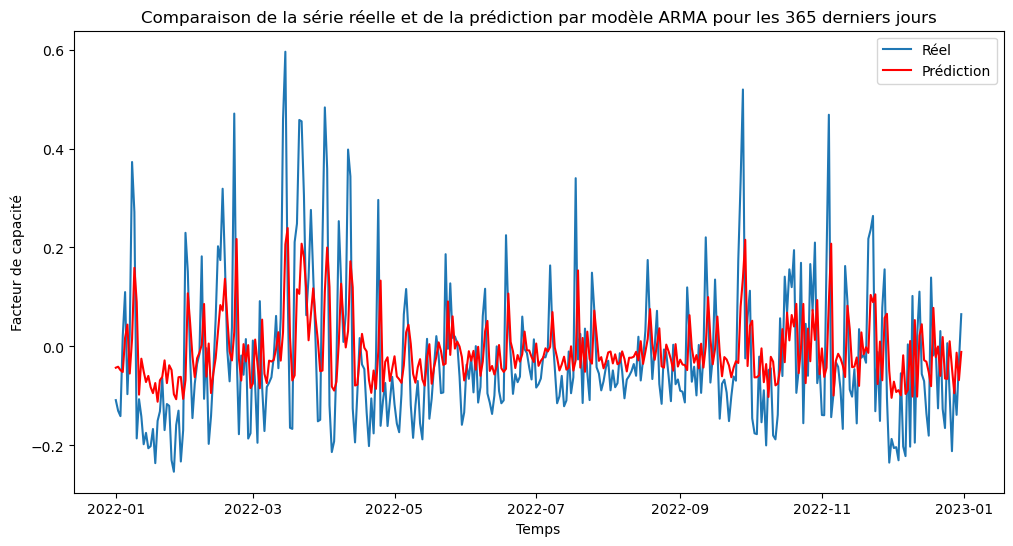

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


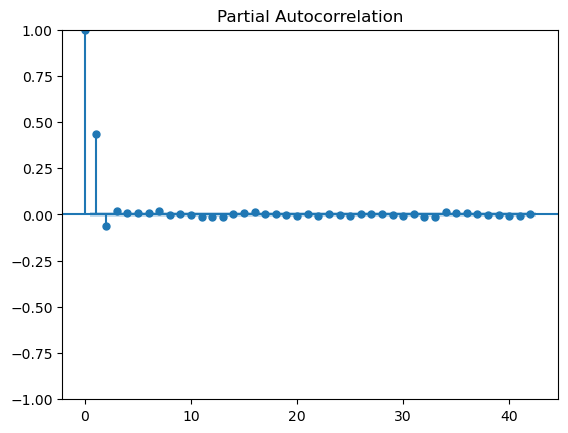

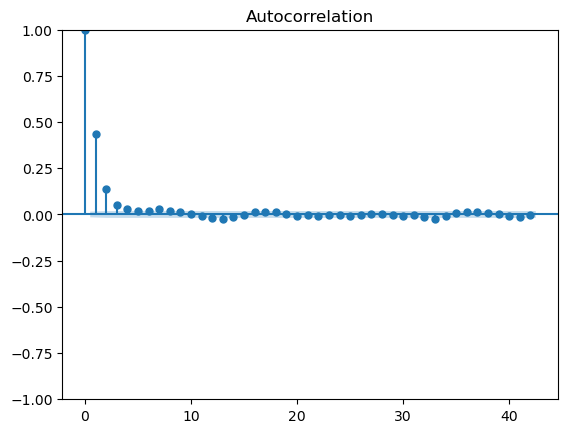

MSE: 0.016882166679355066
MAE: 0.1001077474722541
RMSE: 0.12993139220125005
R²: 0.20782848248782293


In [10]:
from methodes_etude_serie import Arma_predict

p=8
q=11
predict=Arma_predict(data_stationnary['electricity'],p,q,graph_predict=True,graph_predict_last_year=True,graph_autocorrelation=True,error=True)


### 2-2 Arimax modelisation

In [13]:
data_dToulouse_wind.loc['2000-01-01':'2022-12-31', ['electricity']]
# Fusionner les deux DataFrames sur l'index temporel
df_merged = pd.merge(data_stationnary, data_dToulouse_weather, left_index=True, right_index=True)

# Vérifiez que la fusion s'est bien passée
df_merged.head()

# Sélectionner les variables exogènes spécifiques et la variable cible
variables_exogenes = ['wind_speed', 'prectotland', 'cldtot', 'swgdn']
df_for_arimax = df_merged[['electricity'] + variables_exogenes]

In [17]:
from methodes_etude_serie import Arimax_predict

p=8
q=11

pred=Arimax_predict(df_for_arimax, "electricity", p, q, day_exog=0, day_predict=0, int_conf=False, error=False)

TypeError: 'method' object is not subscriptable